#Exercise: Engine RPM vs Fuel Efficiency

Goal: Build an SVR model to predict fuel efficiency based on engine RPM, capturing the non-linear relationship where efficiency peaks at optimal RPM ranges.

##Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

##Importing the dataset

In [2]:
dataset = pd.read_csv('engine_efficiency_curve.csv')

In [3]:
print(dataset)

     RPM  Fuel_Efficiency_mpg
0   1000                   22
1   1500                   28
2   2000                   32
3   2500                   35
4   3000                   38
5   3500                   40
6   4000                   38
7   4500                   35
8   5000                   30
9   5500                   26
10  6000                   22
11  6500                   18


##Creating the matrix of features

In [4]:
X = dataset.iloc[:, :-1].values

In [5]:
print(X)

[[1000]
 [1500]
 [2000]
 [2500]
 [3000]
 [3500]
 [4000]
 [4500]
 [5000]
 [5500]
 [6000]
 [6500]]


##Creating the dependent variable vector

In [6]:
y = dataset.iloc[:, -1].values

In [7]:
print(y)

[22 28 32 35 38 40 38 35 30 26 22 18]


##Transforming the dependent variable vector into a 2D array

In [8]:
y = y.reshape(-1, 1)

In [9]:
print(y)

[[22]
 [28]
 [32]
 [35]
 [38]
 [40]
 [38]
 [35]
 [30]
 [26]
 [22]
 [18]]


##Feature Scaling

In [10]:
from sklearn.preprocessing import StandardScaler

###Feature scaling on matrix of features

In [11]:
sc_X = StandardScaler()
X_scaled = sc_X.fit_transform(X)

In [12]:
print(X_scaled)

[[-1.59325501]
 [-1.30357228]
 [-1.01388955]
 [-0.72420682]
 [-0.43452409]
 [-0.14484136]
 [ 0.14484136]
 [ 0.43452409]
 [ 0.72420682]
 [ 1.01388955]
 [ 1.30357228]
 [ 1.59325501]]


###Feature scaling on dependent variable vector

In [13]:
sc_y = StandardScaler()
y_scaled = sc_y.fit_transform(y)

In [14]:
print(y_scaled)

[[-1.2063086 ]
 [-0.33776641]
 [ 0.24126172]
 [ 0.67553282]
 [ 1.10980391]
 [ 1.39931798]
 [ 1.10980391]
 [ 0.67553282]
 [-0.04825234]
 [-0.62728047]
 [-1.2063086 ]
 [-1.78533673]]


##Building the model

###Building the model using 'linear' kernel

In [15]:
#kernel='linear'
from sklearn.svm import SVR
regressor_linear = SVR(kernel='linear')

###Building the model using 'poly' kernel

In [16]:
#kernel='poly'
from sklearn.svm import SVR
regressor_poly = SVR(kernel='poly')

###Building the model using 'rbf' kernel

In [17]:
#kernel='rbf'
from sklearn.svm import SVR
regressor_rbf = SVR(kernel='rbf')

###Building the model using 'sigmoid' kernel

In [18]:
#kernel='sigmoid'
from sklearn.svm import SVR
regressor_sigmoid = SVR(kernel='sigmoid')

##Training the model

###Training the model using 'linear' kernel

In [19]:
regressor_linear.fit(X_scaled, y_scaled)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='linear')

###Training the model using 'poly' kernel

In [20]:
regressor_poly.fit(X_scaled, y_scaled)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='poly')

###Training the model using 'rbf' kernel

In [21]:
regressor_rbf.fit(X_scaled, y_scaled)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

###Training the model using 'sigmoid' kernel

In [22]:
regressor_sigmoid.fit(X_scaled, y_scaled)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='sigmoid')

##Making predictions

###Making predictions using 'linear' kernel SVR model

In [23]:
#Predict fuel efficiency at 2800 RPM
print(sc_y.inverse_transform(regressor_linear.predict(sc_X.transform([[2800]])).reshape(-1, 1)))
#Predict fuel efficiency at 4800 RPM
print(sc_y.inverse_transform(regressor_linear.predict(sc_X.transform([[4800]])).reshape(-1, 1)))

[[31.78904598]]
[[29.53462894]]


###Making predictions using 'poly' kernel SVR model

In [24]:
#Predict fuel efficiency at 2800 RPM
print(sc_y.inverse_transform(regressor_poly.predict(sc_X.transform([[2800]])).reshape(-1, 1)))
#Predict fuel efficiency at 4800 RPM
print(sc_y.inverse_transform(regressor_poly.predict(sc_X.transform([[4800]])).reshape(-1, 1)))

[[30.60888758]]
[[29.67706188]]


###Making predictions using 'rbf' kernel SVR model

In [25]:
#Predict fuel efficiency at 2800 RPM
print(sc_y.inverse_transform(regressor_rbf.predict(sc_X.transform([[2800]])).reshape(-1, 1)))
#Predict fuel efficiency at 4800 RPM
print(sc_y.inverse_transform(regressor_rbf.predict(sc_X.transform([[4800]])).reshape(-1, 1)))

[[36.68459507]]
[[31.89696914]]


###Making predictions using 'sigmoid' kernel SVR model

In [26]:
#Predict fuel efficiency at 2800 RPM
print(sc_y.inverse_transform(regressor_sigmoid.predict(sc_X.transform([[2800]])).reshape(-1, 1)))
#Predict fuel efficiency at 4800 RPM
print(sc_y.inverse_transform(regressor_sigmoid.predict(sc_X.transform([[4800]])).reshape(-1, 1)))

[[31.99779037]]
[[29.50329592]]


##Visualizing the results

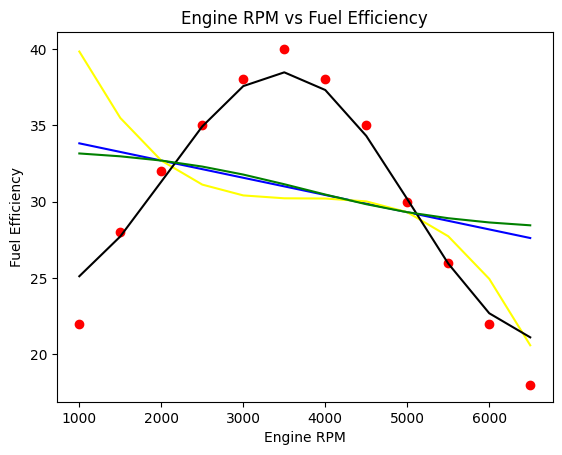

In [27]:
plt.scatter(X, y, color='red')
plt.plot(X, sc_y.inverse_transform(regressor_linear.predict(X_scaled).reshape(-1, 1)), color='blue')
plt.plot(X, sc_y.inverse_transform(regressor_poly.predict(X_scaled).reshape(-1, 1)), color='yellow')
plt.plot(X, sc_y.inverse_transform(regressor_rbf.predict(X_scaled).reshape(-1, 1)), color='black')
plt.plot(X, sc_y.inverse_transform(regressor_sigmoid.predict(X_scaled).reshape(-1, 1)), color='green')
plt.title('Engine RPM vs Fuel Efficiency')
plt.xlabel('Engine RPM')
plt.ylabel('Fuel Efficiency')
plt.show()

###Visualizing the results using 'linear' kernel SVR model

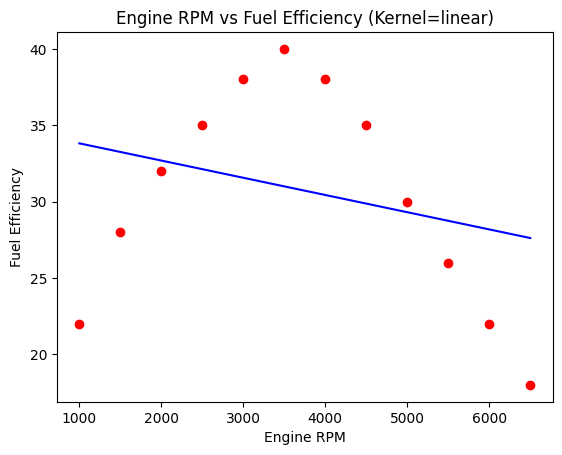

In [28]:
plt.scatter(X, y, color='red')
plt.plot(X, sc_y.inverse_transform(regressor_linear.predict(X_scaled).reshape(-1, 1)), color='blue')
plt.title('Engine RPM vs Fuel Efficiency (Kernel=linear)')
plt.xlabel('Engine RPM')
plt.ylabel('Fuel Efficiency')
plt.show()

###Visualizing the results using 'poly' kernel SVR model

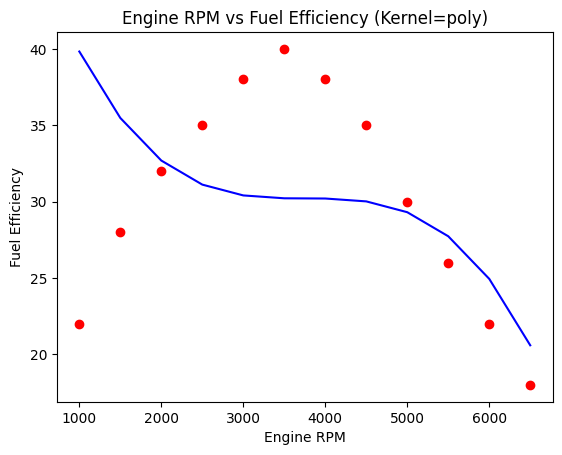

In [29]:
plt.scatter(X, y, color='red')
plt.plot(X, sc_y.inverse_transform(regressor_poly.predict(X_scaled).reshape(-1, 1)), color='blue')
plt.title('Engine RPM vs Fuel Efficiency (Kernel=poly)')
plt.xlabel('Engine RPM')
plt.ylabel('Fuel Efficiency')
plt.show()

###Visualizing the results using 'rbf' kernel SVR model

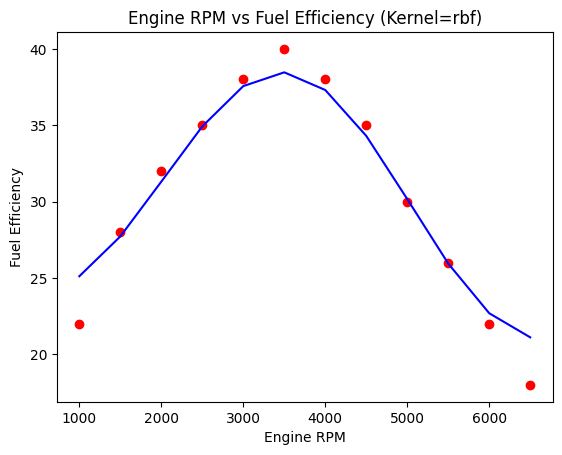

In [30]:
plt.scatter(X, y, color='red')
plt.plot(X, sc_y.inverse_transform(regressor_rbf.predict(X_scaled).reshape(-1, 1)), color='blue')
plt.title('Engine RPM vs Fuel Efficiency (Kernel=rbf)')
plt.xlabel('Engine RPM')
plt.ylabel('Fuel Efficiency')
plt.show()

###Visualizing the results using 'sigmoid' kernel SVR model

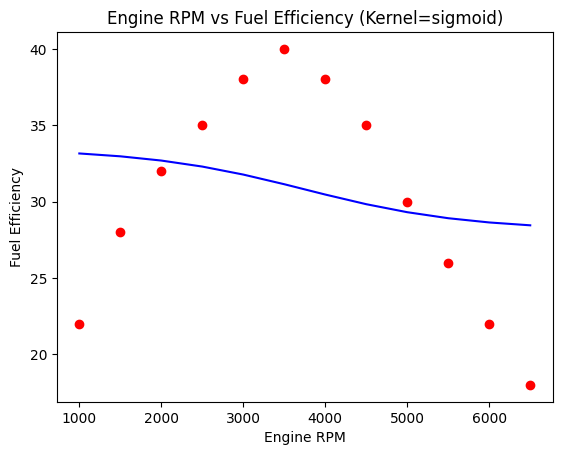

In [31]:
plt.scatter(X, y, color='red')
plt.plot(X, sc_y.inverse_transform(regressor_sigmoid.predict(X_scaled).reshape(-1, 1)), color='blue')
plt.title('Engine RPM vs Fuel Efficiency (Kernel=sigmoid)')
plt.xlabel('Engine RPM')
plt.ylabel('Fuel Efficiency')
plt.show()